Ryan Seaman
James Lau
September 22, 2022

## <center>CS341 Project 1 (due Thursday September, 10, 2020)</center>

## Part 1. Units and Degradation

To model the degradation of protein $P1$, we use the following ODE 

(∗) $\frac{d}{dt}P1(t) = -d1\cdot P1(t)$
 
where $P1$ has units of nM and $t$ has units of seconds (s).

<hr style="border:2px solid gray"> </hr>

(1) What units must d1 have? Show your work.

Since $P1$ has units of nM and $t$ has units of seconds (s) and the unit for the degradation model is nM/s. The unit for d1 has to be 1/s. 

$\frac{d}{dt}P1(t) = -d1\cdot e^{-d1\cdot t}\cdot P1_0$  

Replace with units: P1 = nM t = s -d1 = x

$      \frac{nM}{s}= x\cdot e^{x\cdot s}\cdot nM$ 

For the equation to be completed, let x = 1/s

$      \frac{nM}{s}= \frac{1}{s}\cdot e^{\frac{1}{s}\cdot s}\cdot nM$

$      \frac{nM}{s}=  \frac{nM}{s}$

Therefore the unit for d1 is 1/s

<hr style="border:2px solid gray"> </hr>

This is a linear differential equation, which has an analytic solution 

(†) $P1(t) = e^{-d1\cdot t}\cdot P1_0$

where the initial condition is $P1(0) = P1_0$.

We can confirm that it is a solution by differentiating both sides of (†):

$\frac{d}{dt}(P1(t)) = \frac{d}{dt}(e^{-d1\cdot t}\cdot P1_0) $

And since the $e^t$ is isn't own derivative, we have

$\frac{d}{dt}(P1(t)) = -d1\cdot e^{-d1\cdot t}\cdot P1_0 $

and substituting the definition of $P1(t)$

$\frac{d}{dt}(P1(t)) = -dt\cdot P1(t)$

(2) Using initial condition $P1(0) = 2 nM$ and kinetic parameter $d1=2 s^{-1}$, simulate the system from time $t=0s$ to $t=10$s with a time step of $0.01$s. (Use sciyp.integrate.solve_ivp.)

Plot the simulation result along with the analytic result on the same graph. Be sure to label your axes and to supply a legend. (use matplotlib.pyplot's plot command).

Next, demonstrate that the slope of the solution really is $-d1 P1(t)$ by selecting several points on the solution curve and drawing a short line with slope $-d1 P1(t)$ centered at $P1(t)$. We expect these lines to be tangent lines, if the solution is correct.

Finally, add a new Markdown cell to act as a caption for the figure. It should describe the content of the figure (i.e. it should include that one line is the numerical solution to a simulation, one is the analytic solution, and that there are short lines computed using the RHS of the ODE). It should also explain any conclusions we should draw from this figure. In this case, explain why these short lines demonstrate the curve is the solution.

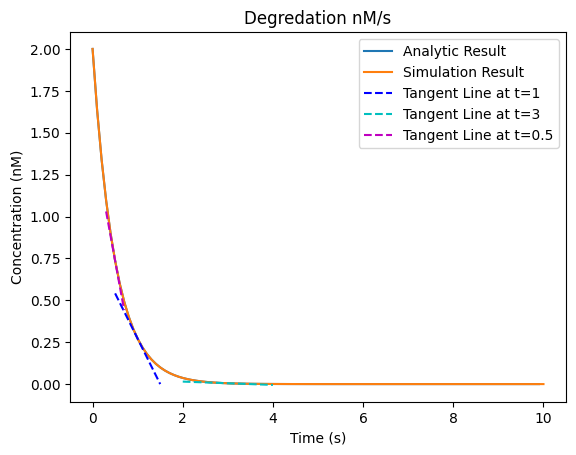

In [63]:
# Write code here
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
from math import e

def degradation_model(t,y):
    return -2*y

t = np.linspace(0, 10, 100)

def analytic (t):
    return (e**(-2*t)) *2

sol = scipy.integrate.solve_ivp(fun=degradation_model, t_span=(0,10), y0=(2,), 
                                t_eval=np.arange(0,10,0.1) )

plt.plot( sol.t, sol.y.T )
plt.plot(t,analytic(t))

#Tangent Lines
def tangent_slope(t):
    y = -2 * (e**(-2*t)) *2
    return y

def trange (t, r):
    return np.linspace(t-r, t+r, 10)

def tangent_line(t,t1,y1):
    return tangent_slope(t1)*(t-t1)+y1
    
#At t = 1
t1 = 1
y1 = analytic(t1)
plt.plot(trange(t1,0.5), tangent_line(trange(t1,0.5), t1, y1), 'b--')

#At t = 3
t2 = 3
y2 = analytic(t2)
plt.plot(trange(t2,1), tangent_line(trange(t2,1), t2, y2),'c--')

#At t = 0.5
t2 = 0.5
y2 = analytic(t2)
plt.plot(trange(t2,0.2), tangent_line(trange(t2,0.2), t2, y2),'m--')

plt.title( "Degredation nM/s" )
plt.xlabel( 'Time (s)')
plt.ylabel( "Concentration (nM)")
plt.legend( ["Simulation Result","Analytic Result","Tangent Line at t=1", "Tangent Line at t=3", "Tangent Line at t=0.5"]);


Figure 1. Graph represents a degredation model, analytic result (blue line) and simulation result (orange line). The tangent line is also displayed on the graph at 3 points (t = 1,3,0.5), calculated using the RHS of the ODE. 

<hr style="border:2px solid gray"> </hr>

(3) The half-life of a protein is the amount of time it takes for the concentration
to halve. What is the half-life of protein P1 (in terms of d1)? Show your work.

Let $t_\frac{1}{2}$ be the time when protein P1 reaches its half-life

$ P1(t) = e^{-d1\cdot t}\cdot P1_0$ 

Let the concentration of P1 be halved at $t_\frac{1}{2}$

$      \frac{P1_0}{2}= e^{-d1\cdot t_\frac{1}{2}}\cdot P1_0$ 

P1 gets factored out of the equation

$      \frac{1}{2}= e^{-d1\cdot t_\frac{1}{2}}\cdot 1$ 

Take the natural log of both sides to simplify the exponent

$      ln (\frac{1}{2}) = -d1\cdot t_\frac{1}{2}$

The answer to $ ln (\frac{1}{2}) = 0.693 $

$      t_\frac{1}{2} = \frac{0.693}{d1}$

Equation for the half-life of protein P1 (in terms of d1)

<hr style="border:2px solid gray"> </hr>

(4) Demonstrate that your calculation of the half-life is correct by re-plotting the numerical solution from above and plotting a vertical line at the half-life and a horizontal line at $P1(0)/2$. Add a new Markdown cell below the figure to describe what it contains and why it shows your calculation is correct.

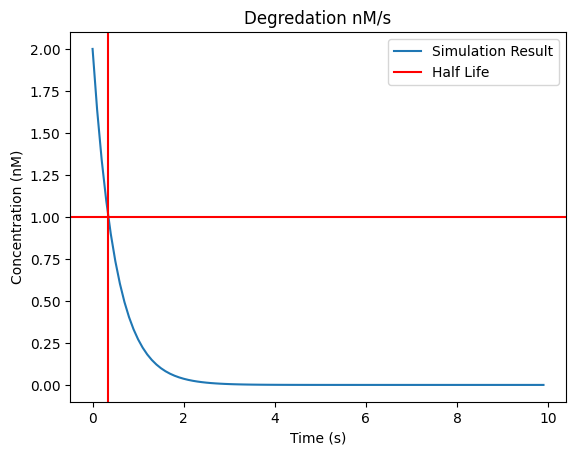

In [110]:
# Write code here

plt.plot( sol.t, sol.y.T )

def half_life(d1):
    return 0.693/d1

d1 = 2
P1 = 2

plt.axhline(y=P1/2,color='r')
plt.axvline(x=half_life(2),color='r')

plt.title( "Degredation nM/s" )
plt.xlabel( 'Time (s)')
plt.ylabel( "Concentration (nM)")
plt.legend( ["Simulation Result","Half Life"]);

Figure 2. Graph represents a degredation model with the simulation result (blue line). The half-life of the protein is shown on the graph at the intersection of the two red lines. The half_life is represented since the lines are intersecting on a point displayed on the graph where $P1_0$ and half_life $t_\frac{1}{2}$.

## Part 2. Dimerization

Consider a system in which two proteins can bind to form a dimer, and unbind to
unform the dimer.

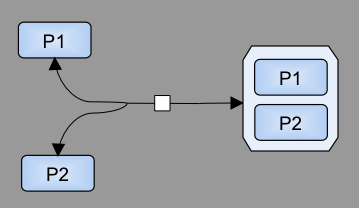

Proteins P1 and P2 can bind to form a dimer and the dimer can unbind to release P1 and P2. In addtion, P1, P2, and the dimer are degraded.

For each process (indicated by the white square), we write the corresponding reaction. Since we are using mass action kinetics, we know that the mathematical expression for each reaction is dependent on the substrates and a kinetic rate constant. To be as informative as possible, we include in our reactions the kinetic rate constant associated with each reaction, i.e. 

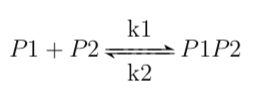

where $k1$ is the rate constant for binding and $k2$ is the rate constant for unbinding.


<hr style="border:2px solid gray"> </hr>

(1) Write down the set of ODEs that describe the dynamics of this system.

Three ODES to describe dimerization. 

(∗) $\frac{dP1}{dt}(t) = -k1\cdot P1\cdot P2 + k2 *P1P2$

(∗) $\frac{dP2}{dt}(t) = -k1\cdot P1\cdot P2 + k2 *P1P2$

(∗) $\frac{dP1P2}{dt}(t) = -k2\cdot P1P2 + k1 \cdot P1 \cdot P2$

<hr style="border:2px solid gray"> </hr>

(2) Using initial conditions $P1(0) = 2 nM$, $P2(0) = 3 nM$, and $P1P2(0) = 1 nM$ and kinetic parameters $k1= 1nM^{-1}s^{-1}$ and $k2=2 s^{-1}$, simulate the system from time $t=0s$ to $t=10s$ with a time step of $0.01s$.

Plot the results, being sure to label your axes and to supply a legend. Add a new Markdown cell below the figure to describe what it contains and why the basic trajectories of the curves makes sense, given the ODEs.

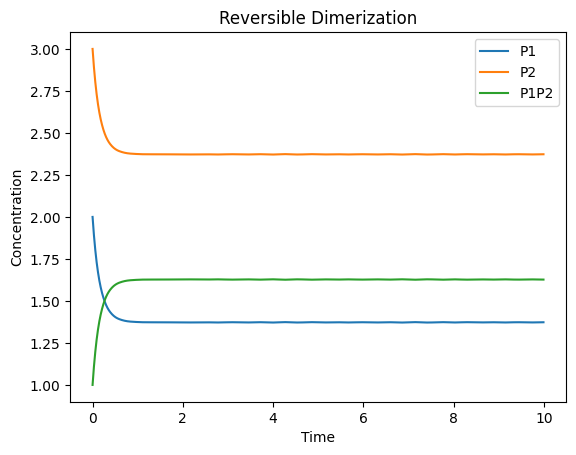

In [18]:
# Write code here
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

def rev_dimer_model(t,y,params):
    
    k1 = params[0]
    k2 = params[1]
    
    P1 = y[0];
    P2 = y[1]
    P1P2 = y[2]
    
    dydt = np.zeros((3,))
    dydt[0] = (-k1 * P1 * P2) + (k2 * P1P2)
    dydt[1] = (-k1 * P1 * P2) + (k2 * P1P2)
    dydt[2] = (-k2 * P1P2) + (k1 * P1 * P2)
    
    
    return dydt

params = (1,2)

sol = scipy.integrate.solve_ivp(fun = rev_dimer_model, t_span = (0,10), y0= (2,3,1),
                                t_eval = np.arange(0,10,0.01), args = (params,))

plt.plot( sol.t, sol.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1","P2","P1P2"])
plt.title( "Reversible Dimerization");


<hr style="border:2px solid gray"> </hr>

(3) Steady-state is achieved when the rates are at zero. What is the steady-state for this system? Explain the relationships between the steady-states of $P1$, $P2$, and $P1P2$. Why are they in such a relationship? (i.e. relate the parameters to the steady-states)

*Remove this line and use this cell for your solution.*



<hr style="border:2px solid gray"> </hr>

(4) Re-run the simulation with $k1=1nM^{-1}s^{-1}$ and $k2=1s^{-1}$ and plot the results. Add a new Markdown cell below the figure to describe what it contains.

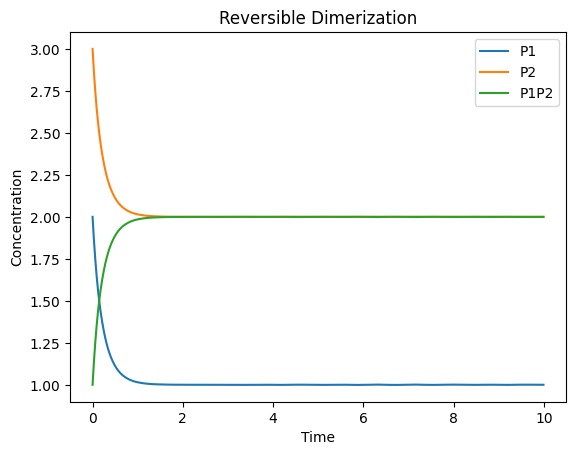

In [11]:
# Write code here.

params1 = (1,1)

sol1 = scipy.integrate.solve_ivp(fun = rev_dimer_model, t_span = (0,10), y0= (2,3,1),
                                t_eval = np.arange(0,10,0.01), args = (params1,))

plt.plot( sol1.t, sol1.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1","P2","P1P2"])
plt.title( "Reversible Dimerization");

<hr style="border:2px solid gray"> </hr>

(5) The rate constants for binding and unbinding are identical. But this does not mean that the system begins in steady-state. Why not?

*Remove this line and use this cell for your solution.*

<hr style="border:2px solid gray"> </hr>

(6) Explain what has changed in the relationship between the steady-states of the molecular concentrations. Why have those changes occurred?

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible. You could demonstrate the calculation for extreme values of k1 and k2, produce annotated figures, and demonstrate the relationship between simulation output and calculations you perform.*

*Remove this line and use this cell for your solution.*

# Part 3. Dimerization with Degradation

We add to our system the process of degradation.

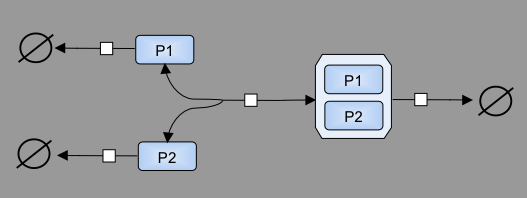

Proteins P1 and P2 can bind to form a dimer and the dimer can unbind to release P1 and P2. In addtion, P1, P2, and the dimer are degraded.

For each process (indicated by the white square), we write the corresponding reaction (including rate constants), i.e. 

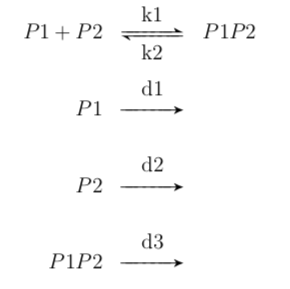

<hr style="border:2px solid gray"> </hr>

(1) Write down the set of ODEs that describe the dynamics of this system.

*Remove this line and use this cell for your solution.*

$\frac{dP1(t)}{dt} = -d1\cdot P1(t)$

$\frac{dP2(t)}{dt} = -d2\cdot P2(t)$

$\frac{dP1P2(t)}{dt} = -d3\cdot P1P2(t)$

<hr style="border:2px solid gray"> </hr>

(2) Using initial conditions $P1(0) = 2 nM$, $P2(0) = 3 nM$, and $P1P2(0) = 1 nM$ and kinetic parameters $k1= 1nM^{-1}s^{-1}$, $k2=2 s^{-1}$ and $d1=d2=d3=1 s^{-1}$, simulate the system from time $t=0s$ to $t=10s$ with a time step of $0.01s$.

Plot the results, being sure to label your axes and to supply a legend.

ValueError: operands could not be broadcast together with shapes (6,) (3,) 

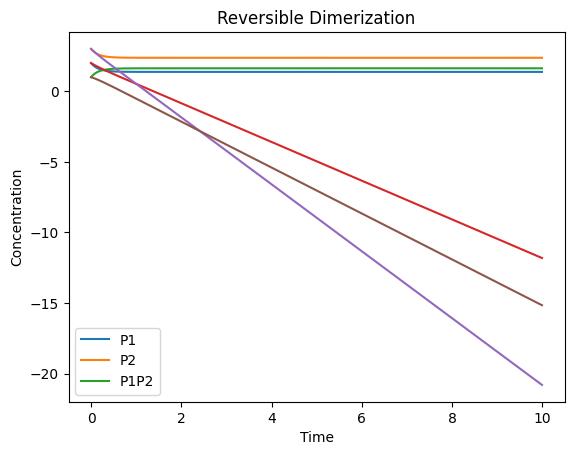

In [36]:
# Write code here.
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

def dimer_w_degradation_model(t,y,params):
    
    k1 = params[0]
    k2 = params[1]
    d1 = params[2]
    d2 = params[3]
    d3 = params[4]
    
    P1 = y[0]
    P2 = y[1]
    P1P2 = y[2]
    
    dydt = np.zeros((6,))
    dydt[0] = (-k1 * P1 * P2) + (k2 * P1P2)
    dydt[1] = (-k1 * P1 * P2) + (k2 * P1P2)
    dydt[2] = (-k2 * P1P2) + (k1 * P1 * P2)
    dydt[3] = -d1 * P1
    dydt[4] = -d2 * P2
    dydt[5] = -d3 * P1P2
    
    return dydt

params = (1,2,1,1,1)

sol = scipy.integrate.solve_ivp(fun = dimer_w_degradation_model, t_span = (0,10), y0= (2,3,1,2,3,1),
                                t_eval = np.arange(0,10,0.01), args = (params,))


plt.plot( sol.t, sol.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1","P2","P1P2"])
plt.title( "Reversible Dimerization");



def dimer_w_degradation_model1(t,y,params):
    
    k1 = params[0]
    k2 = params[1]
    d1 = params[2]
    d2 = params[3]
    d3 = params[4]
    
    P1 = y[0]
    P2 = y[1]
    P1P2 = y[2]
    
    dydt = np.zeros((3,))
    dydt[0] = (-k1 * P1 * P2) + (k2 * P1P2) + (-d1 * P1)
    dydt[1] = (-k1 * P1 * P2) + (k2 * P1P2) + (-d2 * P2)
    dydt[2] = (-k2 * P1P2) + (k1 * P1 * P2) + (-d3 * P2)
    
    return dydt

params = (1,2,1,1,1)

sol = scipy.integrate.solve_ivp(fun = dimer_w_degradation_model, t_span = (0,10), y0= (2,3,1),
                                t_eval = np.arange(0,10,0.01), args = (params,))




<hr style="border:2px solid gray"> </hr>

(3) Describe the interesting features of the data. For example, is there a steady-state? If so, what is it and why did the system approach it? Are there any peaks? If so, why are they there?

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

*Remove this line and use this cell for your solution.*

<hr style="border:2px solid gray"> </hr>

(4) Find a set of parameter values (all $\ge10^{-12}$) for which the dimer's apparent steady-state concentration is higher than the steady-states of $P1$ and $P2$. What intuition did you use to find these values?

Note: By "apparent steady-state", I mean the value that $P1P2$ seems to remain at during the time-period of the simulation (i.e. its value from say 5s to 10s). Given that degradation is included in the model, the steady-state as time goes to infinity will always be zero for all three proteins.  But I am interested in the behavior on the timescale of seconds -- not years. 

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

*Remove this line and use this cell for your solution.*

<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*